In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


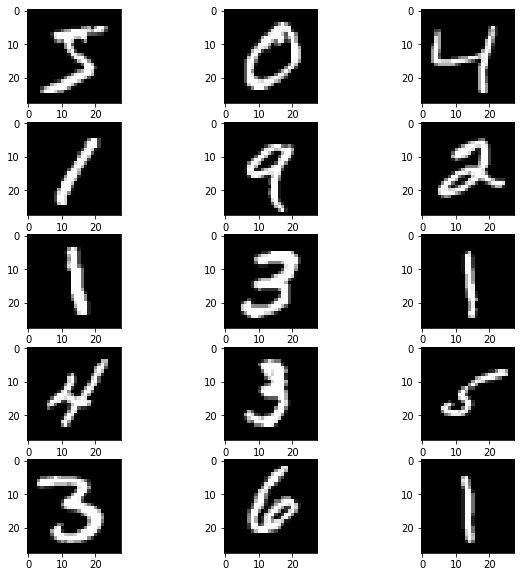

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
c = 0
for x in range(5):
    for y in range(3):
        plt.subplot(5,3,c+1)
        plt.imshow(x_train[c], cmap='gray')
        c+=1
plt.show()
print(y_train[:15])


Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_59 (Flatten)        (None, 784)               0         
                                                                 
 dense_215 (Dense)           (None, 1024)              803840    
                                                                 
 batch_normalization_48 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dropout_146 (Dropout)       (None, 1024)              0         
                                                                 
 dense_216 (Dense)           (None, 512)               524800    
                                                                 
 batch_normalization_49 (Bat  (None, 512)              2048      
 chNormalization)                                    

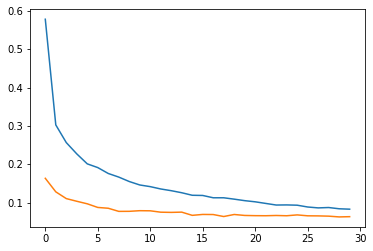

In [108]:
## 5층 설계 
initializer = tf.keras.initializers.HeNormal()
# 모델 레이어 설정
basic_model_5 = tf.keras.models.Sequential([
  #x_train.shape[1] is 28 x 28 2d array. To input these values to input layer, I'll flatten this to number of 784(28 x 28) values
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation='relu', kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
  tf.keras.layers.BatchNormalization(),
  # in this case, we have to update number of 784(from input) * 256(number of weights) + 256(number of biases) parameters.
  tf.keras.layers.Dropout(0.6),
  tf.keras.layers.Dense(512, activation='relu', kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.6),
  tf.keras.layers.Dense(256, activation='relu', kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.6),
  # for the multi classification(classifying 0 ~ 9 digits), I use softmax activatoin function.
  tf.keras.layers.Dense(10, activation='softmax')
])

# 옵티마이저와 손실함수를 설정하고 정확도 매트릭스가 나오게 컴파일
basic_model_5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
         
# 모델의 모습을 표로 출력
basic_model_5.summary()
# 위의 레이어를 가진 모델로 5번 학습시킴
history_five_layers_model = basic_model_5.fit(x_train, y_train, epochs=30, validation_split=0.2)
# 검증을 해봄
print(basic_model_5.evaluate(x_test, y_test))
# overfitting validation
plt.plot(history_five_layers_model.history['loss'])
plt.plot(history_five_layers_model.history['val_loss'])